In [191]:
import os
import numpy as np 
import pandas as pd 
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
warnings.filterwarnings("ignore")
pd.set_option("display.max_rows",None)
from sklearn import preprocessing
import matplotlib 
matplotlib.style.use('ggplot')
from sklearn.preprocessing import LabelEncoder

In [192]:
df=pd.read_csv('/content/drive/MyDrive/Heart Disease/heart.csv')

In [193]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


**lets cheak if there is null valuse and the the dtype**

In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


good the data is free from null valuse 

Now we need to convert the dtype "opject" to "string"   

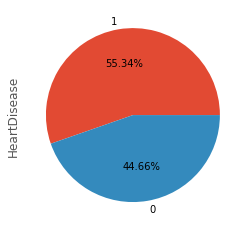

In [215]:
df['HeartDisease'].value_counts().plot.pie(autopct='%1.2f%%')

In [195]:
strings=df.select_dtypes(include="object").columns
df[strings]=df[strings].astype("string")

*Now it is converted to  string so we make use of it later*

In [196]:
df.dtypes

Age                 int64
Sex                string
ChestPainType      string
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         string
MaxHR               int64
ExerciseAngina     string
Oldpeak           float64
ST_Slope           string
HeartDisease        int64
dtype: object

In [197]:
strings=df.select_dtypes('string').columns.to_list()

In [198]:
strings

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

In [199]:
df[strings].head()
for col in strings:
    print(f"the count valuse in {col} is : ")
    print(df[col].value_counts(),"\n")

the count valuse in Sex is : 
M    725
F    193
Name: Sex, dtype: Int64 

the count valuse in ChestPainType is : 
ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: Int64 

the count valuse in RestingECG is : 
Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: Int64 

the count valuse in ExerciseAngina is : 
N    547
Y    371
Name: ExerciseAngina, dtype: Int64 

the count valuse in ST_Slope is : 
Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: Int64 



now lets convert them to useable types in our model 

In [200]:
df=df.apply(LabelEncoder().fit_transform)

In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Age             918 non-null    int64
 1   Sex             918 non-null    int64
 2   ChestPainType   918 non-null    int64
 3   RestingBP       918 non-null    int64
 4   Cholesterol     918 non-null    int64
 5   FastingBS       918 non-null    int64
 6   RestingECG      918 non-null    int64
 7   MaxHR           918 non-null    int64
 8   ExerciseAngina  918 non-null    int64
 9   Oldpeak         918 non-null    int64
 10  ST_Slope        918 non-null    int64
 11  HeartDisease    918 non-null    int64
dtypes: int64(12)
memory usage: 86.2 KB


In [202]:
print((df['Cholesterol']==0).value_counts(),'\n',(df['RestingBP']==0).value_counts(),(df['Age']==0).value_counts(),'\n',(df['MaxHR']==0).value_counts(),'\n')

False    746
True     172
Name: Cholesterol, dtype: int64 
 False    917
True       1
Name: RestingBP, dtype: int64 False    917
True       1
Name: Age, dtype: int64 
 False    917
True       1
Name: MaxHR, dtype: int64 



ploting the corrlation between the columns and the heart diseases

In [203]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=0,strategy='mean')
df['Cholesterol']=imputer.fit_transform(df[['Cholesterol']])
df['Age']=imputer.fit_transform(df[['Age']])
df['RestingBP']=imputer.fit_transform(df[['RestingBP']])
df['MaxHR']=imputer.fit_transform(df[['MaxHR']])

In [204]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,12.0,1,1,41.0,147.0,0,1,98.0,0,10,2,0
1,21.0,0,2,55.0,40.0,0,1,82.0,0,20,1,1
2,9.0,1,1,31.0,141.0,0,2,25.0,0,10,2,0
3,20.0,0,0,39.0,72.0,0,1,34.0,1,25,1,1
4,26.0,1,2,49.0,53.0,0,1,48.0,0,10,2,0


In [205]:
px.imshow(df.corr(),title="corrlations between columns and heart disease")

as we can see some of the columns have a negative corrlation with the heart disease

In [206]:
disease=df['HeartDisease']
cols=df.iloc[:,:-1]
corrlation=cols.corrwith(disease==1)


In [207]:
cols.columns 

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope'],
      dtype='object')

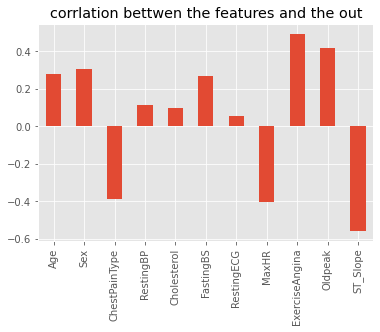

In [208]:
corrlation.plot(kind='bar',title='corrlation bettwen the features and the out')

In [209]:
corrlation

Age               0.279873
Sex               0.305445
ChestPainType    -0.386828
RestingBP         0.116292
Cholesterol       0.099912
FastingBS         0.267291
RestingECG        0.057384
MaxHR            -0.401552
ExerciseAngina    0.494282
Oldpeak           0.420282
ST_Slope         -0.558771
dtype: float64

lets drop all the nagitive corrlation coloumns

In [210]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,12.0,1,1,41.0,147.0,0,1,98.0,0,10,2,0
1,21.0,0,2,55.0,40.0,0,1,82.0,0,20,1,1
2,9.0,1,1,31.0,141.0,0,2,25.0,0,10,2,0
3,20.0,0,0,39.0,72.0,0,1,34.0,1,25,1,1
4,26.0,1,2,49.0,53.0,0,1,48.0,0,10,2,0


Now or data is ready for split and train 

In [211]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

spliting the data

In [212]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=9,shuffle=True)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((734, 11), (184, 11), (734,), (184,))

training the model

lets do a small polt to see what is the idel max depth for our random froest model 

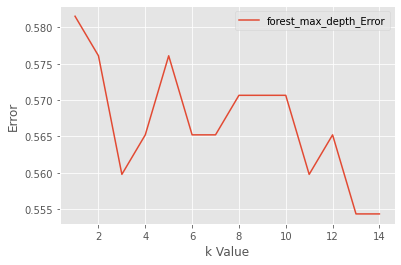

In [246]:
error=[]

for k in range(1,15):
    forest = RandomForestClassifier(max_depth =k, min_samples_split=3, n_estimators = 100, random_state = 1)
    forest.fit(X_train,y_train)
    y_pred= forest.predict(X_test)
    error.append(np.mean(y_pred))
plt.figure('test K')
plt.plot(range(1,15),error,label="forest_max_depth_Error")
plt.xlabel('k Value')
plt.ylabel('Error')
plt.legend()
plt.show()

acc score is : 0.8804347826086957
RandomForestClassifier cnf_metrix : 



Text(33.0, 0.5, 'Actual')

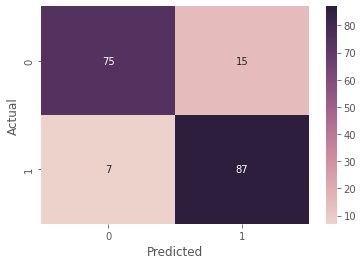

In [247]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics  import accuracy_score,confusion_matrix
forest = RandomForestClassifier(max_depth =13, min_samples_split=3, n_estimators = 100, random_state = 1)
forest.fit(X_train,y_train)
forest_Pred = forest.predict(X_test)
print("acc score is :",accuracy_score(forest_Pred,y_test))

print("RandomForestClassifier cnf_metrix : \n")
cnf_metrix3 = confusion_matrix(y_test,forest_Pred)
cmap = sns.cubehelix_palette(50, as_cmap='.2f')
sns.heatmap(cnf_metrix3,cmap = cmap,xticklabels=['0','1'],yticklabels=['0','1'],annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')